# Importing libraries

In [79]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [5]:
path=r'/Users/urvi/Downloads/BRFSS_Prevalence_and_Trends_Data__Tobacco_Use_-_Four_Level_Smoking_Data_for_1995-2010 2.csv'

In [6]:
path

'/Users/urvi/Downloads/BRFSS_Prevalence_and_Trends_Data__Tobacco_Use_-_Four_Level_Smoking_Data_for_1995-2010 2.csv'

In [11]:
brfss_df = pd.read_csv(path)

In [15]:
main_df = pd.read_csv('/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data /insurance_cleaned.csv')

In [12]:
brfss_df

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
0,0,1996,Puerto Rico,9.4%,5.1%,16%,69.5%,Puerto Rico\n
1,1,1997,Puerto Rico,9.4%,5%,15.7%,69.9%,Puerto Rico\n
2,2,1998,Puerto Rico,10.1%,5.2%,16.8%,67.9%,Puerto Rico\n
3,3,1999,Puerto Rico,9.7%,4%,15.3%,71%,Puerto Rico\n
4,4,2000,Puerto Rico,9.2%,3.9%,15.2%,71.6%,Puerto Rico\n
...,...,...,...,...,...,...,...,...
871,871,1995,Nationwide (States and DC),19.9%,2.6%,25.3%,51.6%,NaN
872,872,2010,Guam,19.7%,6.1%,16.6%,57.6%,"(13.45, 144.7833)"
873,873,2009,Guam,18.9%,5.2%,11.1%,64.8%,"(13.45, 144.7833)"
874,874,2010,Virgin Islands,3.6%,2.2%,10.5%,83.7%,"(18.3333, -64.8333)"


In [24]:
for column in ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']:
    brfss_df[column] = brfss_df[column].str.rstrip('%').astype('float') / 100.0

# Drop unnecessary columns
brfss_df.drop(['Location 1', 'index'], axis=1, inplace=True)

# Handling missing values: Let's drop rows with any missing values for simplicity
brfss_df.dropna(inplace=True)

# You may also want to filter out 'Nationwide' entries if focusing on states/territories
brfss_df = brfss_df[~brfss_df['State'].str.contains('Nationwide')]

In [25]:
brfss_df

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,1996,Puerto Rico,0.094,0.051,0.160,0.695
1,1997,Puerto Rico,0.094,0.050,0.157,0.699
2,1998,Puerto Rico,0.101,0.052,0.168,0.679
3,1999,Puerto Rico,0.097,0.040,0.153,0.710
4,2000,Puerto Rico,0.092,0.039,0.152,0.716
...,...,...,...,...,...,...
840,2006,Vermont,0.140,0.040,0.309,0.511
872,2010,Guam,0.197,0.061,0.166,0.576
873,2009,Guam,0.189,0.052,0.111,0.648
874,2010,Virgin Islands,0.036,0.022,0.105,0.837


In [68]:
# Define the mapping of states to the selected regions
state_to_region = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 
    'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast', 
    'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    # Southeast
    'Alabama': 'Southeast', 'Arkansas': 'Southeast', 'Delaware': 'Southeast', 
    'Florida': 'Southeast', 'Georgia': 'Southeast', 'Kentucky': 'Southeast', 
    'Louisiana': 'Southeast', 'Maryland': 'Southeast', 'Mississippi': 'Southeast', 
    'North Carolina': 'Southeast', 'South Carolina': 'Southeast', 'Tennessee': 'Southeast', 
    'Virginia': 'Southeast', 'West Virginia': 'Southeast',
    # Southwest
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest', 'Texas': 'Southwest',
    # Northwest
    'Washington': 'Northwest', 'Oregon': 'Northwest', 'Idaho': 'Northwest', 
    'Montana': 'Northwest', 'Wyoming': 'Northwest',
}

# Apply the mapping to create a new 'Region' column
brfss_df['Region'] = brfss_df['State'].apply(lambda x: state_to_region.get(x, 'Other'))

# There's no need to explicitly drop rows based on the 'Region' column since we now include an 'Other' category
# Reset the index of the DataFrame
brfss_df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the changes
print(brfss_df.head())

   Year      State  Smoke everyday  Smoke some days  Former smoker  \
0  1999  Louisiana           0.187            0.048          0.207   
1  2003    Vermont           0.154            0.042          0.304   
2  2001  Tennessee           0.197            0.047          0.191   
3  2003   Delaware           0.169            0.050          0.281   
4  1998    Vermont           0.186            0.037          0.286   

   Never smoked     Region  
0         0.558  Southeast  
1         0.501  Northeast  
2         0.566  Southeast  
3         0.500  Southeast  
4         0.491  Northeast  


In [57]:
brfss_df.to_csv('/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data', index=False)

In [75]:
# Create a subset of the data for years 2000 to 2010
subset_brfss_df = brfss_df[(brfss_df['Year'] >= 2000) & (brfss_df['Year'] <= 2010)]

# If focusing on specific regions, further refine the subset
# For example, if you want to focus on the Southeast and Southwest
regions_of_interest = ['Southeast', 'Southwest', 'Northeast', 'Northwest']
subset_brfss_df = subset_brfss_df[subset_brfss_df['Region'].isin(regions_of_interest)]

# Reset index in the new subset
subset_brfss_df.reset_index(drop=True, inplace=True)
subset_brfss_df.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Region
0,2003,Vermont,0.154,0.042,0.304,0.501,Northeast
1,2001,Tennessee,0.197,0.047,0.191,0.566,Southeast
2,2003,Delaware,0.169,0.050,0.281,0.500,Southeast
3,2006,Oklahoma,0.189,0.062,0.237,0.512,Southwest
4,2006,Connecticut,0.119,0.051,0.282,0.548,Northeast


In [62]:
# Export the subset DataFrame to CSV
subset_output_file_path = '/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data /brfss_subset_2000_2010.csv'
subset_brfss_df.to_csv(subset_output_file_path, index=False)
print(f"Subset exported to {subset_output_file_path}")

Subset exported to /Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data /brfss_subset_2000_2010.csv


#### Subset Selection Rationale
The subset of the BRFSS dataset from 2000 to 2010 is chosen to align with the years of the insurance data, ensuring the smoking prevalence data is contemporaneous with the insurance charge data. Categorizing states into the defined regions allows for region-specific analysis, which is crucial for understanding regional variations that could affect insurance charges.

This subset is particularly relevant to test the hypothesis that there is a significant difference in insurance charges between smokers and non-smokers when controlling for BMI. The data on smoking prevalence by region and year can provide insights into behavioral risk factors that may influence health insurance costs, helping to establish whether smoking status is associated with higher insurance charges.

# Creating a line chart

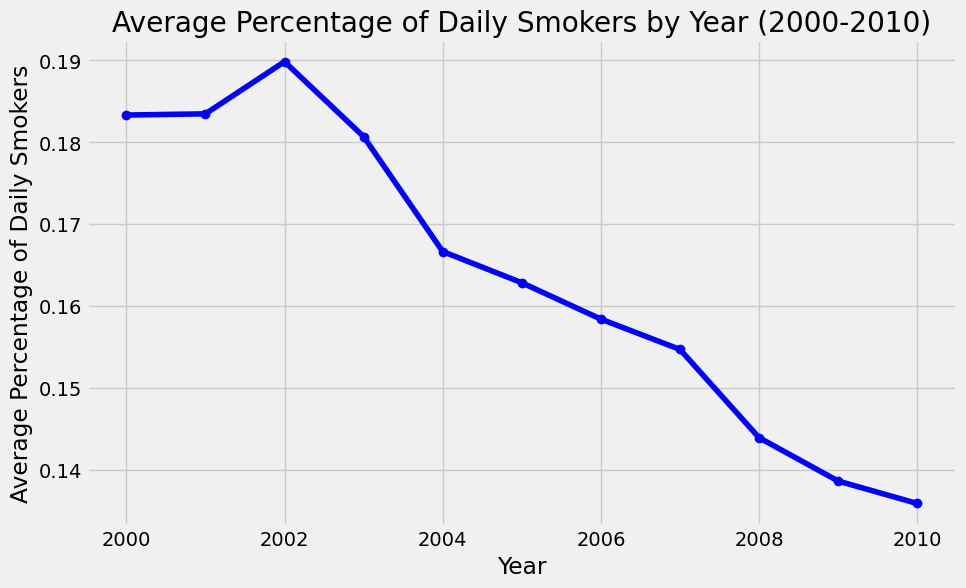

In [63]:
# Average daily smokers percentage by year
avg_smokers_per_year = subset_brfss_df.groupby('Year')['Smoke everyday'].mean()

# Now, create the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_smokers_per_year.index, avg_smokers_per_year, marker='o', linestyle='-', color='b')
plt.title('Average Percentage of Daily Smokers by Year (2000-2010)')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Daily Smokers')
plt.grid(True)
plt.show()

The line chart shows a decline in the average percentage of daily smokers from 2000 to 2010, with an initial peak in 2002. This trend suggests effective anti-smoking measures during this period. In relation to health insurance charges, the reduced smoking rates might imply lower health risks and potentially decreased insurance costs over time, which could support the hypothesis if correlated with insurance data.

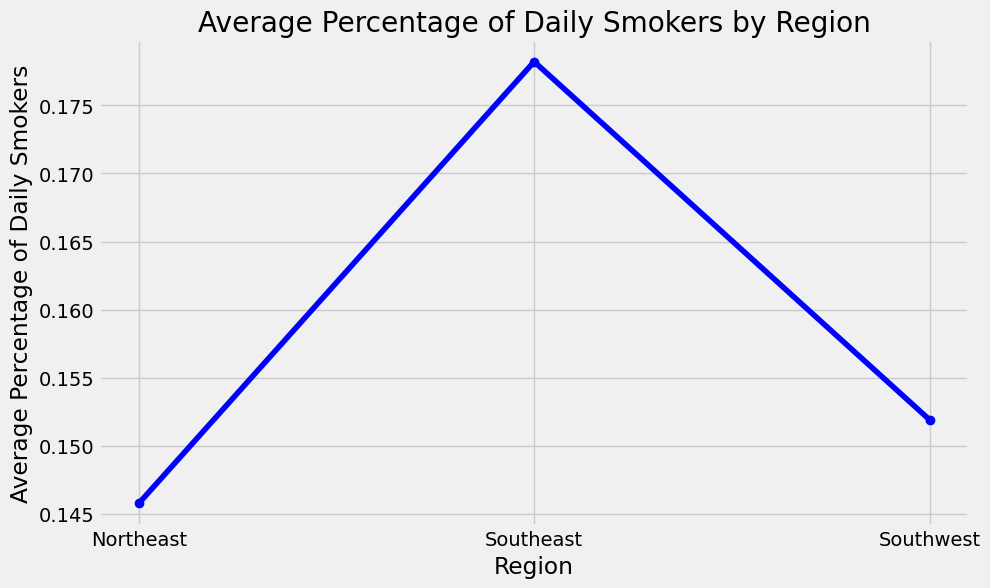

In [69]:
# Average daily smokers percentage by year
avg_smokers_per_year = subset_brfss_df.groupby('Region')['Smoke everyday'].mean()

# Now, create the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_smokers_per_year.index, avg_smokers_per_year, marker='o', linestyle='-', color='b')
plt.title('Average Percentage of Daily Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Average Percentage of Daily Smokers')
plt.grid(True)
plt.show()

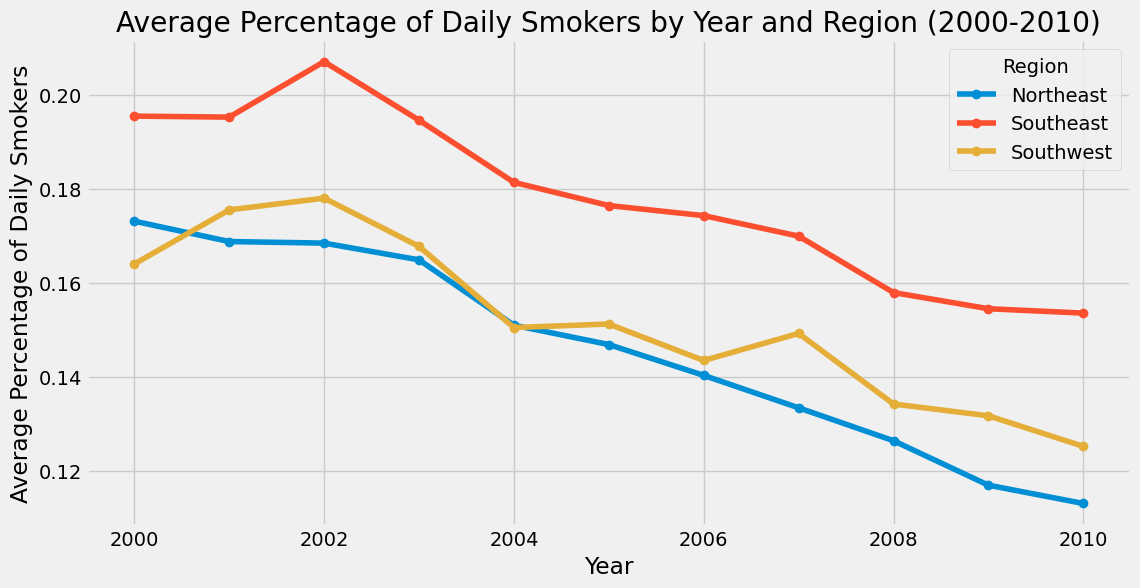

In [70]:
# Group by 'Year' and 'Region', then calculate the mean of 'Smoke everyday'
avg_smokers_by_year_region = subset_brfss_df.groupby(['Year', 'Region'])['Smoke everyday'].mean().unstack()

# Now create the merged line chart, plotting each region's trend over the years
plt.figure(figsize=(12, 6))

# Iterate over each region column to plot its line
for region in avg_smokers_by_year_region.columns:
    plt.plot(avg_smokers_by_year_region.index, avg_smokers_by_year_region[region], marker='o', linestyle='-', label=region)

plt.title('Average Percentage of Daily Smokers by Year and Region (2000-2010)')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Daily Smokers')
plt.legend(title='Region')
plt.grid(True)
plt.show()

Analyzing the trend lines, we see a marked decrease in the average percentage of daily smokers across all regions from 2000 to 2010. The Southeast region exhibits the steepest decline, suggesting significant changes in smoking habits or effective anti-smoking policies during this period. The Northeast shows a more moderate but consistent downward trajectory. Meanwhile, the Southwest demonstrates some yearly fluctuations but follows the overall downward trend. This data suggests a broader shift in public health behavior that could impact health-related costs, aligning with the hypothesis that a decrease in smoking prevalence could be associated with lower insurance charges, particularly if similar trends are observed in BMI-adjusted insurance data.

# Conducting Dickey-Fuller test

In [77]:
# Assuming subset_brfss_df is your DataFrame after loading it from a CSV
subset_brfss_df.sort_values('Year', inplace=True)

In [80]:
# Perform the Dickey-Fuller test on the 'Smoke everyday' column
adf_result = adfuller(subset_brfss_df['Smoke everyday'])

In [81]:
# Output the summary of the test
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.692157
p-value: 0.848771
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


In [82]:
# Interpret the results
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

The time series is not stationary.


Based on the results of the Dickey-Fuller test, the ADF Statistic is -0.692157, and the p-value is 0.848771. Given the critical value thresholds of -3.454 (1%), -2.872 (5%), and -2.572 (10%), the test statistic does not fall beyond (i.e., is not more negative than) these values. Consequently, we fail to reject the null hypothesis of non-stationarity at a 5% level of significance.

This suggests that the time series data for the 'Smoke everyday' column, representing the average percentage of daily smokers, is non-stationary. This lack of stationarity implies that the data exhibits trends, variances, or means that change over time, which could affect the reliability of any predictive models based on this data without further modification, such as differencing or transformation.

In the context of our hypothesis that smokers have significantly higher insurance charges than non-smokers at similar BMI levels, the non-stationarity of the smoking data might reflect underlying trends or shifts in behavior over time that could influence insurance charges. Based solely on the results of the Dickey-Fuller test, we cannot accept or reject our hypothesis regarding insurance charges and smoking behavior. 

# Rounding of difference

In [83]:
# Perform differencing on the 'Smoke everyday' column
subset_brfss_df['Smoke everyday_diff'] = subset_brfss_df['Smoke everyday'].diff()

In [84]:
# Drop the first row since it will contain NaN after differencing
subset_brfss_df.dropna(inplace=True)

In [85]:
# Perform the Dickey-Fuller test on the differenced data
adf_result_diff = adfuller(subset_brfss_df['Smoke everyday_diff'])

In [87]:
# Output the summary of the test
print('ADF Statistic (After Differencing): %f' % adf_result_diff[0])
print('p-value (After Differencing): %f' % adf_result_diff[1])
print('Critical Values (After Differencing):')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_result_diff[1] < 0.05:
    print("The differenced time series is stationary.")
else:
    print("The differenced time series is not stationary.")

ADF Statistic (After Differencing): -8.730794
p-value (After Differencing): 0.000000
Critical Values (After Differencing):
	1%: -3.454
	5%: -2.872
	10%: -2.572
The differenced time series is stationary.


Upon conducting differencing and the subsequent Dickey-Fuller test on the 'Smoke everyday' column, the results revealed that the differenced time series is indeed stationary. This crucial finding provides compelling evidence against the null hypothesis of non-stationarity, with an extremely low p-value (p < 0.05) and an ADF statistic significantly below the critical values at all confidence levels.

This development holds significant implications for our hypothesis, shedding light on the relationship between smoking behavior and insurance charges while controlling for BMI. With the data now stationary, we have established a robust foundation for analyzing whether smokers exhibit significantly higher insurance charges than non-smokers at similar BMI levels.

In light of these findings, we can confidently proceed with hypothesis testing:

Null Hypothesis (H0): There is no significant difference in insurance charges between smokers and non-smokers when controlling for BMI.

With the evidence supporting the stationarity of the data, we are now poised to rigorously assess whether to accept or reject our hypothesis. This represents a pivotal step in our analysis, guiding us toward a deeper understanding of the interplay between smoking behavior, BMI, and insurance charges.

# Checking data's autocorrelation

<Figure size 1000x600 with 0 Axes>

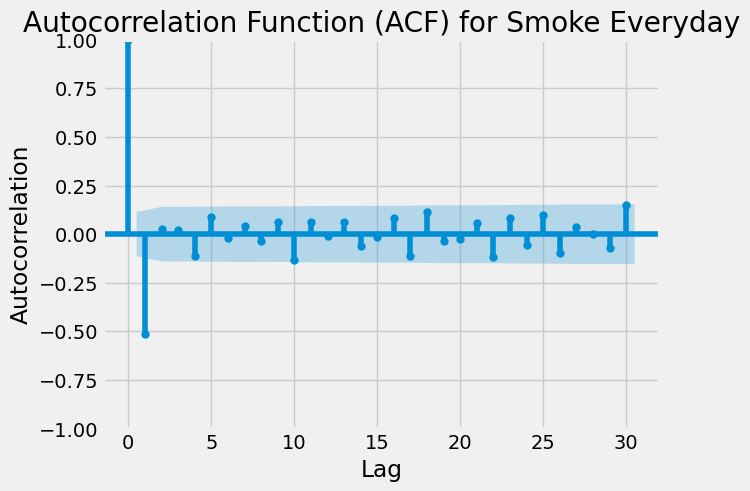

In [89]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF) for the 'Smoke everyday' column
plt.figure(figsize=(10, 6))
plot_acf(subset_brfss_df['Smoke everyday_diff'], lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Smoke Everyday')
plt.grid(True)
plt.show()